# Problema Clasificacion Regresión Logistica Titanic

# Carga de librerías:

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from IPython.core.display import display, HTML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Definición de funciones:

In [2]:
def relaciones_vs_target(X, Y, return_type='axes'):
    '''
    Función que representa gráficos de dispersión de las variables
    en X en función a la variable Y
    '''
    fig_tot = (len(X.columns))
    fig_por_fila = 4
    tamanio_fig = 4
    num_filas = int( np.ceil(fig_tot/fig_por_fila) )    
    plt.figure( figsize=( fig_por_fila*tamanio_fig+5, num_filas*tamanio_fig+5 ) )
    c = 0 
    for i, col in enumerate(X.columns):
        plt.subplot(num_filas, fig_por_fila, i+1)
        sns.scatterplot(x=X[col], y=Y)
        plt.title( '%s vs %s' % (col, 'target') )
        plt.ylabel('Target')
        plt.xlabel(col)
    plt.show()

def represento_doble_hist(x_1, x_0, n_bins=11, title='', label_1='Clase 1', 
                          label_0='Clase 0', density=0):
    '''
    Función que recibe dos distribuciones de probabilidad y las representa
    en el mismo gráfico
    '''
    bins = n_bins
    plt.hist(x_1, bins, density = density, alpha=0.5, label=label_1, color='red')    
    plt.hist(x_0, bins, density = density, alpha=0.5, label=label_0, color='green')
    plt.title(title)
    plt.legend(loc='best') 

def hist_pos_neg_feat(x, y, density=0, nbins=11, targets=(0,1)):
    '''
    Representa las variables en x divididas en dos distribuciones
    según su valor de y sea 1 o 0
    '''
    fig_tot = len(x.columns)
    fig_tot_fila = 4; fig_tamanio = 4
    num_filas = int( np.ceil(fig_tot/fig_tot_fila) )
    plt.figure( figsize=( fig_tot_fila*fig_tamanio+2, num_filas*fig_tamanio+2 ) )
    target_neg, target_pos = targets
    for i, feat in enumerate(x.columns):
        plt.subplot(num_filas, fig_tot_fila, i+1);
        plt.title('%s' % feat)
        idx_pos = y == target_pos
        idx_neg= y == target_neg
        represento_doble_hist(x[feat][idx_pos].values, x[feat][idx_neg].values, nbins, 
                   density = density, title=('%s' % feat))

# Lectura de datos:

In [3]:
# Defino la lista de nombres de las variables

#XY_train = pd.read_csv('C:/Users/aitor/OneDrive/Escritorio/Anaconda/input/titanic/train.csv', sep=',')
#XY_test = pd.read_csv('C:/Users/aitor/OneDrive/Escritorio/Anaconda/input/titanic/test.csv', sep=',')

In [4]:
#MAC

XY_train = pd.read_csv('/Users/aitorelordizamora/Documents/input/titanic/train.csv', sep=',')
XY_test = pd.read_csv('/Users/aitorelordizamora/Documents/input/titanic/test.csv', sep=',')


In [5]:
XY_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
XY_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
XY_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
XY_test.shape

(418, 11)

In [9]:
print(u'- El número de filas en el dataset es: {}'.format(XY_train.shape[0]))
print(u'- El número de columnas en el dataset es: {}'.format(XY_train.shape[1]))
print(u'- Los nombres de las variables son: {}'.format(list(XY_train.columns)))

- El número de filas en el dataset es: 891
- El número de columnas en el dataset es: 12
- Los nombres de las variables son: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


# Preprocesamiento de datos

# Missings:

In [10]:
XY_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
XY_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
#Hay que corregir o no los valores faltantes para poder hacer esta operación

mean = XY_train['Age'].mean()
XY_train['Age'].fillna(mean, inplace=True)
XY_train.Age = XY_train.Age.astype(int)
XY_train.Fare = XY_train.Fare.astype(int)

mean = XY_test['Fare'].mean()
mean2 = XY_test['Age'].mean()
XY_test['Fare'].fillna(mean, inplace=True)
XY_test['Age'].fillna(mean2, inplace=True)
XY_test.Age = XY_test.Age.astype(int)
XY_test.Fare = XY_test.Fare.astype(int)

In [13]:
XY_test.shape

(418, 11)

In [14]:
le = LabelEncoder()

In [15]:
#Es necesario convertir las variables categóricas a numéricas de cara a introducirlas en modelos:

XY_train.Pclass = le.fit_transform(XY_train.Pclass)
XY_train.Sex = le.fit_transform(XY_train.Sex)
XY_train.Embarked = le.fit_transform(XY_train.Embarked)


XY_test.Pclass = le.fit_transform(XY_test.Pclass)
XY_test.Sex = le.fit_transform(XY_test.Sex)
XY_test.Embarked = le.fit_transform(XY_test.Embarked)



In [16]:
del XY_train['Name']
del XY_train['Ticket']
del XY_train['Cabin']
del XY_train['PassengerId']

del XY_test['Name']
del XY_test['Ticket']
del XY_test['Cabin']



# Comprobación tipos no numéricos:

In [17]:
XY_train.select_dtypes(exclude=['number']).columns

Index([], dtype='object')

# Division en features X + target Y

In [42]:
X = XY_train.drop('Survived', axis=1)
Y = XY_train['Survived']

In [43]:
XY_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,1.308642,0.647587,29.544332,0.523008,0.381594,31.785634,1.538721
std,0.486592,0.836071,0.477990,13.013778,1.102743,0.806057,49.703730,0.794231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000,7.000000,1.000000
50%,0.000000,2.000000,1.000000,29.000000,0.000000,0.000000,14.000000,2.000000
75%,1.000000,2.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,2.000000,1.000000,80.000000,8.000000,6.000000,512.000000,3.000000


# Boxplots:

In [44]:
X_normalizado = (X-X.mean())/X.std()

In [45]:
X_normalizado[:2]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.826913,0.737281,-0.579719,0.43255,-0.473408,-0.498667,0.580788
1,-1.565228,-1.354813,0.649747,0.43255,-0.473408,0.788962,-1.937372


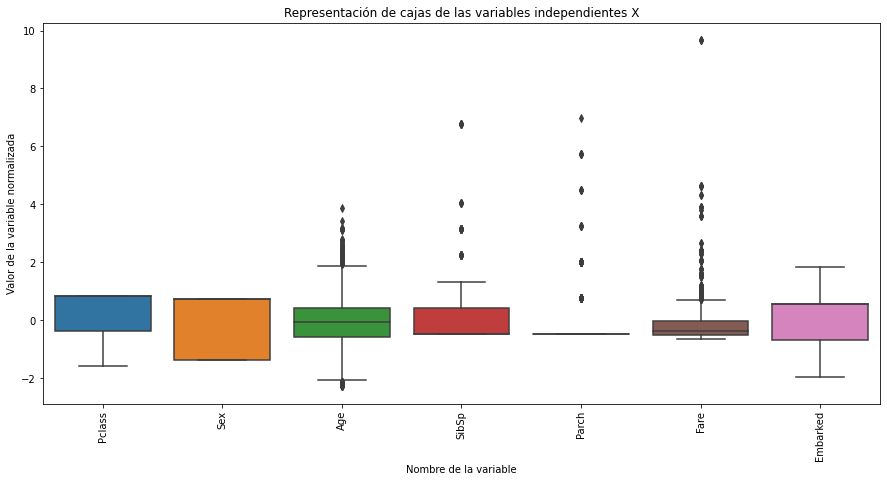

In [46]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=X_normalizado)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title(u'Representación de cajas de las variables independientes X')
plt.ylabel('Valor de la variable normalizada')
_ = plt.xlabel('Nombre de la variable')

# Histogramas:

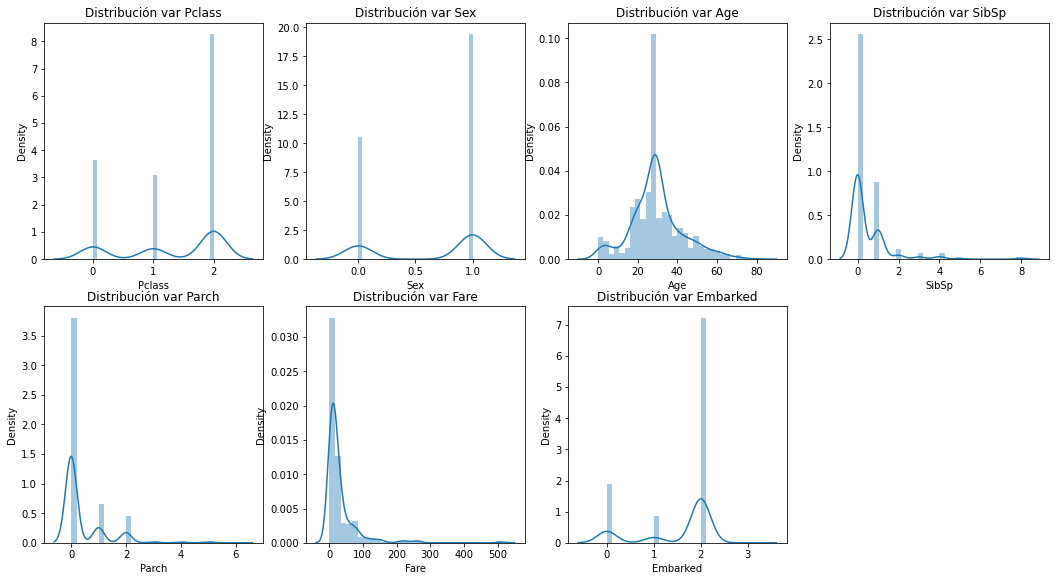

In [47]:
plt.figure(figsize=(18,20))
n = 0
for i, column in enumerate(X.columns):
    n+=1
    plt.subplot(4, 4, n)
    sns.distplot(X[column], bins=30)
    plt.title('Distribución var {}'.format(column))
plt.show()

# Relación variable vs target:

In [50]:
display(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [49]:
relaciones_vs_target(X, Y)

ValueError: Number of columns must be a positive integer, not 4.0

<Figure size 1512x936 with 0 Axes>

In [51]:
hist_pos_neg_feat(X,Y)

ValueError: Number of columns must be a positive integer, not 4.0

<Figure size 1296x720 with 0 Axes>

Estos gráficos son interesantes para analizar el poder predictivo de las variables. Cuanto más se separen las dos distribuciones, mejor para predecir ya que es más fácil discriminarlas.

# Matriz de correlaciones:

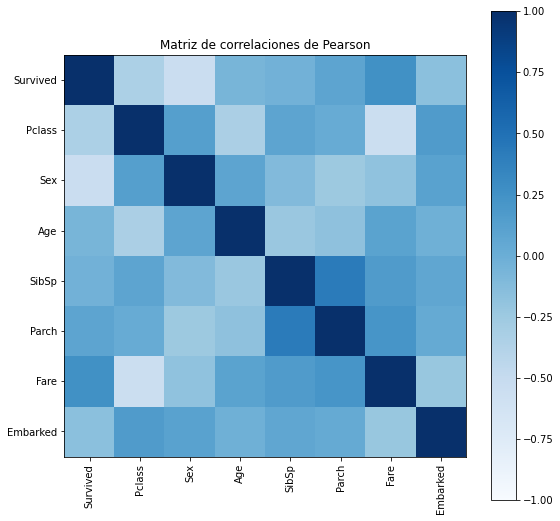

In [52]:
matriz_correlaciones = XY_train.corr(method='pearson')
n_ticks = len(XY_train.columns)
plt.figure( figsize=(9, 9) )
plt.xticks(range(n_ticks), XY_train.columns, rotation='vertical')
plt.yticks(range(n_ticks), XY_train.columns)
plt.colorbar(plt.imshow(matriz_correlaciones, interpolation='nearest', 
                            vmin=-1., vmax=1., 
                            cmap=plt.get_cmap('Blues')))
_ = plt.title('Matriz de correlaciones de Pearson')

# Variables con mayor correlación con la target:

In [53]:
correlaciones_target = matriz_correlaciones.values[ -1, : -1]
indices_inversos =  abs(correlaciones_target[ : ]).argsort()[ : : -1]
diccionario = {}
for nombre, correlacion in zip( X.columns[indices_inversos], list(correlaciones_target[indices_inversos] ) ):
    diccionario[nombre] = correlacion
pd.DataFrame.from_dict(diccionario, orient='index', columns=['Correlación con la target'])

,Correlación con la target
Embarked,-0.220645
Pclass,-0.163517
Sex,0.157112
Age,0.104057
Parch,0.066654
Fare,0.038322
SibSp,-0.018402


# Estandarización de los datos previa:

Como se comenta en la unidad, hay modelos que parten de la hipótesis que los datos son centrados y, por tanto, se necesita estandarizar. Suele ser una buena práctica porque no suele perjudicar.
Además, la inversa se puede realizar de forma sencilla.

In [ ]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

# División en train y test:

# Aplicamos un modelo de regresión logística

In [54]:
modelo = LogisticRegression()
parametros = {"C": [0., 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,0.09], 
              "class_weight":['balanced', None]}

In [55]:
modelo_gs = GridSearchCV(modelo, param_grid=parametros,
                         cv = 5, scoring='roc_auc')
modelo_gs.fit(X, Y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                               0.08, 0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [56]:
print(modelo_gs.best_params_, "\nROC AUC: {}".format(round(modelo_gs.best_score_,2)))

{'C': 0.09, 'class_weight': None} 
ROC AUC: 0.85


In [57]:
df_search = pd.DataFrame.from_dict(modelo_gs.cv_results_)

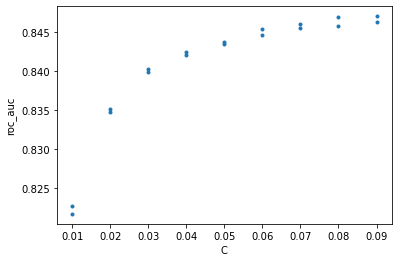

In [58]:
plt.xlabel('C')
plt.ylabel('roc_auc')
_ = plt.plot( df_search['param_C'], df_search['mean_test_score'], '.')

# Analizando el modelo con el mejor alpha

En este paso nos quedamos con los mejores parámetros obtenidos en el paso anterior:

In [59]:
reg_log =  LogisticRegression(C=modelo_gs.best_params_['C'],
                              class_weight=modelo_gs.best_params_['class_weight'])

Ajusto a todos los datos de entrenamiento.

In [60]:
reg_log.fit(X, Y)

LogisticRegression(C=0.09)

# Predicción

In [61]:
y_pred = reg_log.predict(X)

In [62]:
#Realizo la prediccion para los datos test
ids = XY_test['PassengerId']
predictions = reg_log.predict(XY_test.drop('PassengerId', axis=1))


output = pd.DataFrame({
    'PassengerId': ids,
    'Survived' : predictions
})

#output.to_csv('submission.csv', index=False)

In [63]:
display(output)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
